Mean Squared Error: 820561270978.6793
R-squared: 0.07959213360697215
Predicted Price for the new property: 584392.2482827755


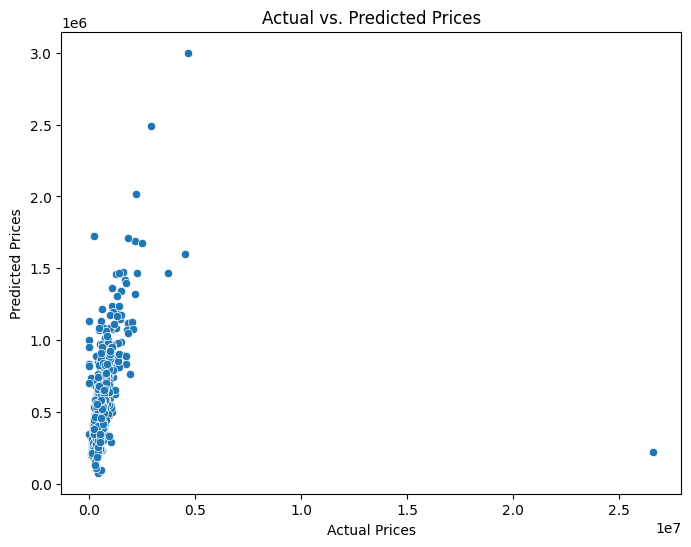

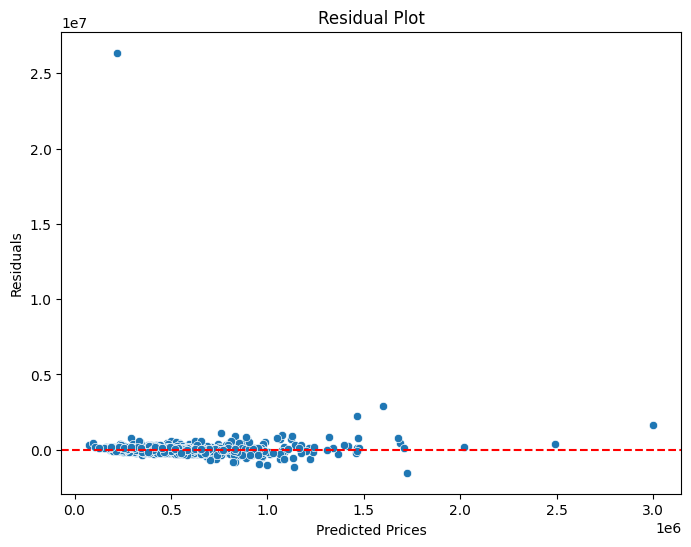

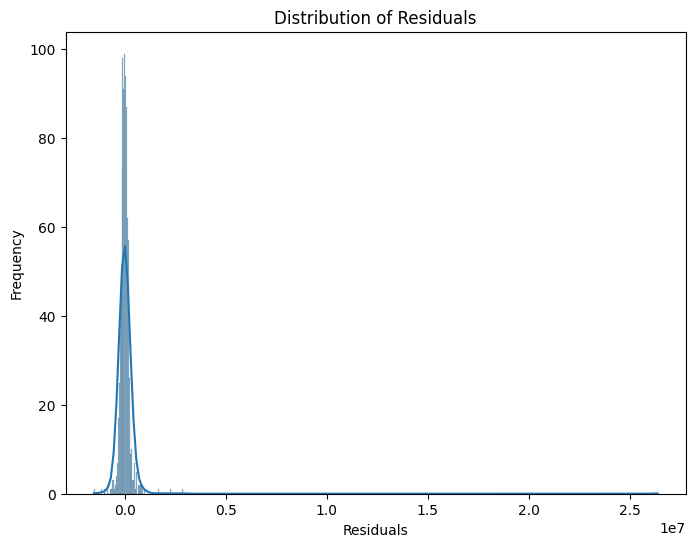

In [3]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/content/data.csv')

# Drop unnecessary columns
data = data.drop(['city', 'statezip', 'country', 'street', 'date'], axis=1)

y = data['price']
X = data.drop(['price'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Standardize the features (scaling)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict the price for a new property
new_property_features = pd.DataFrame({
    'bedrooms': [3],
    'bathrooms': [2],
    'sqft_living': [1800],
    'sqft_lot': [7000],
    'floors': [1],
    'waterfront': [0],
    'view': [2],
    'condition': [3],
    'sqft_above': [1600],
    'sqft_basement': [200],
    'yr_built': [1950],
    'yr_renovated': [2000]
})

# Standardize the new property's features using the same scaler
new_property_features_scaled = scaler.transform(new_property_features)

predicted_price = model.predict(new_property_features_scaled)
print("Predicted Price for the new property:", predicted_price[0])

import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

